<a href="https://www.kaggle.com/code/danuherath/mall-customers-clustering?scriptVersionId=218266374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center"> Mall Customers Segmentation (Clustering) </h1>

<img
    src="https://storage.googleapis.com/kaggle-datasets-images/new-version-temp-images/default-backgrounds-31.png-1508014/dataset-cover.png"
    alt="" 
    width="500" 
    height="400" 
    style="display: block; margin: 0 auto; border-radius:15px" 
/>


* [Mall_Customers Dataset](https://www.kaggle.com/datasets/shwetabh123/mall-customers)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RSEED = 42


In [2]:
data = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
# Step 1: Exploratory Data Analysis
---

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.describe(include=['object'])


,Genre
count,200
unique,2
top,Female
freq,112


In [6]:
data = data.rename(
    columns={
        "Genre": "Gender",
        "Annual Income (k$)": "AnnualIncome",
        "Spending Score (1-100)": "SpendingScore"
    })
data.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



## Step 1.1: Data Visualization
---

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AnnualIncome', ylabel='Count'>

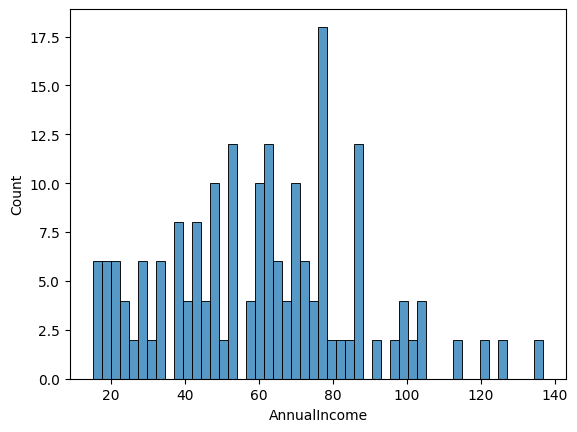

In [7]:
sns.histplot(data['AnnualIncome'], kde=False, bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SpendingScore', ylabel='Count'>

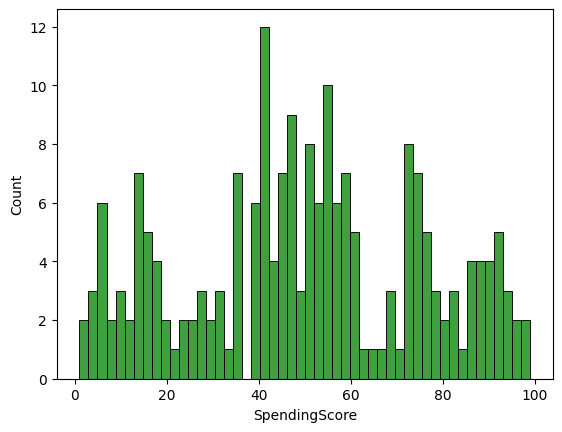

In [8]:
sns.histplot(data['SpendingScore'], kde=False, bins=50, color='green')

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

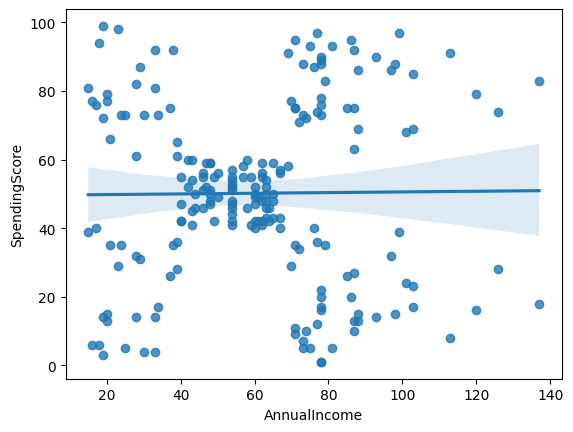

In [9]:
sns.regplot(x='AnnualIncome', y='SpendingScore', data=data)

<Axes: xlabel='Age', ylabel='SpendingScore'>

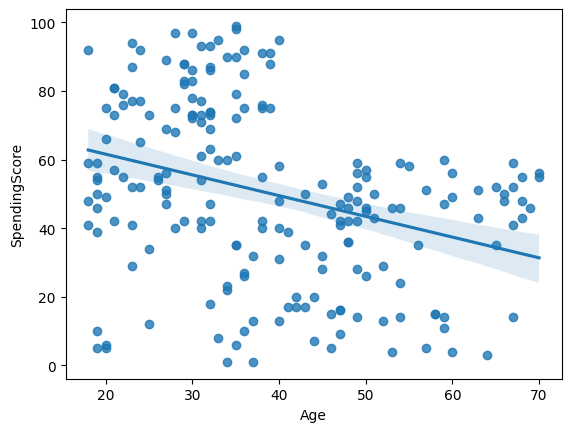

In [10]:
sns.regplot(x='Age', y='SpendingScore', data=data)

---
# Step 2: Data Preprocessing
---

In [11]:
data = data.drop(columns = ['CustomerID', 'Gender', 'Age'])

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['AnnualIncome', 'SpendingScore']])

mall_customers_normalized = pd.DataFrame(scaled_data, columns=data.columns)
mall_customers_normalized.head()


,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


---
# Step 3: Model Training and Evaluation
---

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=RSEED)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


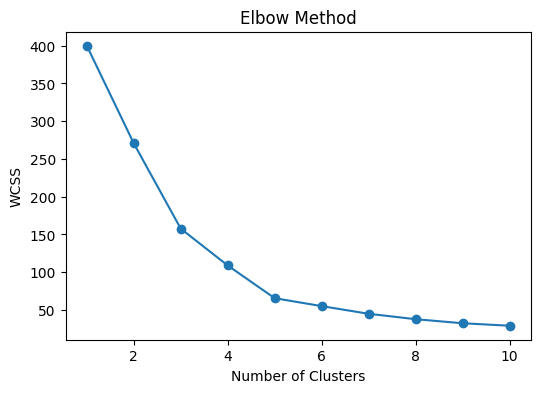

In [14]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=RSEED)
cluster_labels_kmeans = kmeans.fit_predict(scaled_data)
data['Cluster'] = cluster_labels_kmeans

silhouette_kmeans = silhouette_score(mall_customers_normalized, cluster_labels_kmeans)
print(f"Silhouette score for 5 K-Means clusters: {silhouette_kmeans:.4f}")

data.head()


Silhouette score for 5 K-Means clusters: 0.5547


,AnnualIncome,SpendingScore,Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [16]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [17]:
original_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
original_centroids


array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

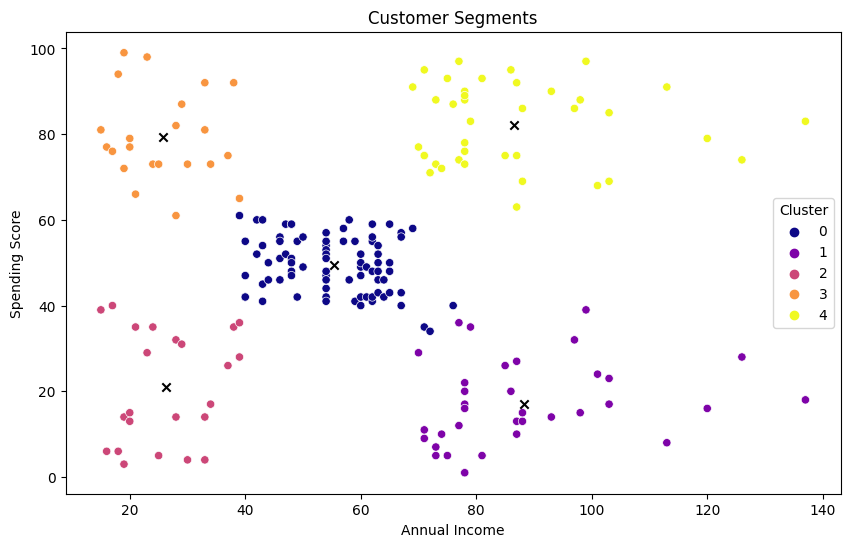

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['AnnualIncome'], y=data['SpendingScore'], hue=data['Cluster'], palette='plasma')
plt.scatter(
    original_centroids[:, 0], original_centroids[:, 1], label='Centroids', marker='x', c='k'
)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
